<a href="https://colab.research.google.com/github/Magnusrm/TDAT3025-Machine-Learning/blob/master/Task1.2/oppg_c.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

W1 = [[-6.976896  8.562379]
 [-6.977287  8.565215]],W2 = [[13.516603]
 [13.40475 ]], b1 = [[10.456435  -3.9693391]], b2 = [[-19.915403]], loss = 0.0018608472


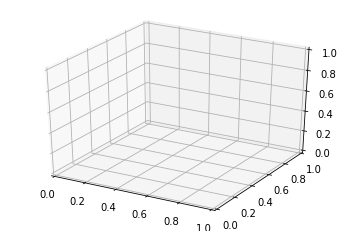

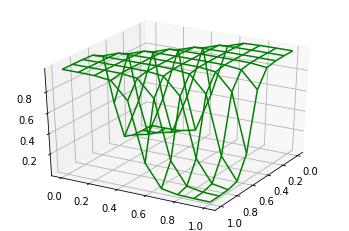

In [0]:
import tensorflow as tf
import pandas as pd
import numpy as np


x_train = np.mat([[0, 1], [1, 1], [1, 0], [0,0]])
y_train = np.mat([[1], [0], [1], [0]])

class SigmoidModel:
    def __init__(self):
        # Model input
        self.x = tf.placeholder(tf.float32)
        self.y = tf.placeholder(tf.float32)

        # Model variables
        self.W1 = tf.Variable(tf.random_uniform([2, 2], -1, 1))
        self.W2 = tf.Variable(tf.random_uniform([2, 1], -1, 1))
        self.b1 = tf.Variable([[0.0, 0.0]])
        self.b2 = tf.Variable([[0.0]])

        # Predictors
        self.f1 = tf.sigmoid(tf.matmul(self.x, self.W1) + self.b1)
        self.f2 = tf.sigmoid(tf.matmul(self.f1, self.W2) + self.b2)

        self.loss = tf.reduce_mean(((self.y * tf.log(self.f2)) + ((1 - self.y) * tf.log(1.0 - self.f2))) * -1)


# The training data
x_train = np.mat([[0, 1], [1, 1], [1, 0], [0,0]])
y_train = np.mat([[1], [0], [1], [0]])

model = SigmoidModel()

# Training: adjust the model so that its loss is minimized
minimize_operation = tf.train.GradientDescentOptimizer(1).minimize(model.loss)

# Create session object for running TF operations
session = tf.Session()

# Init tf.Variable objects
session.run(tf.global_variables_initializer())

for epoch in range(10000):
    session.run(minimize_operation, {model.x: x_train, model.y: y_train})

# Evaluate training accuracy
W1, W2, b1, b2, loss = session.run([model.W1, model.W2, model.b1, model.b2, model.loss], {model.x: x_train, model.y: y_train})
print("W1 = %s,W2 = %s, b1 = %s, b2 = %s, loss = %s" % (W1, W2, b1, b2, loss))

session.close()


import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d

fig = plt.figure()
ax = fig.gca(projection='3d')

# Observed/training input and output

# The training data
x_train = np.mat([[0,1], [1,1], [1,0], [0,0]])
y_train = np.mat([[1], [0], [1], [0]])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# ax.plot(x_train, y_train, z_train, 'o', label='$(\\hat x^{(i)},\\hat y^{(i)})$')
#ax.scatter(x_train1, x_train2, y_train, marker='o', label='$y = f(x, z) = xW1 + zW2 + b$')

class Model:
    def __init__(self, W1, W2, b1, b2):
        self.W1 = W1
        self.W2 = W2
        self.b1 = b1
        self.b2 = b2


    def g(self, z):
        return 1 / (1 + np.exp(-z))

    # Predictor
    def f(self, x):
        f1 = self.g(x * self.W1 + self.b1)
        f2 = self.g(f1 * self.W2 + self.b2)
        return f2


model1 = Model(np.mat(W1), np.mat(W2), np.mat(b1), np.mat(b2))
x1_test = np.arange(0, 1, 0.001)
x2_test = np.arange(0, 1, 0.001)

'''
x1_test, x2_test = np.meshgrid(x1_test, x2_test)
z_test = model1.f(x1_test, x2_test)
'''
'''x = np.mat([[np.min(x1_test)], [np.max(x2_test)]])
ax.plot(x, model1.f(x), label='$y = f(x) = xW+b$')'''

x_grid, y_grid = np.meshgrid(np.linspace(np.min(x_train[:, 0]), np.max(x_train[:, 0]), 10), np.linspace(np.min(x_train[:, 1]), np.max(x_train[:, 1]), 10))
z_grid = np.empty(x_grid.shape)
for i in range(0, z_grid.shape[0]):
    for j in range(0, z_grid.shape[1]):
        z_grid[i, j] = model1.f([[x_grid[i, j], y_grid[i, j]]])
ax.plot_wireframe(x_grid, y_grid, z_grid, color='green', label='$y = f(x) = xW+b$')



#z_test = np.arange(0, 1, 0.001)

#model = LinearRegressionModel(np.mat(W1),np.mat(W2),np.mat(b))
'''
x_surface1 = [[np.min(x_train1)], [np.min(x_train1)], [np.max(x_train1)], [np.max(x_train1)]]
x_surface2 = [[np.min(x_train2)], [np.min(x_train2)], [np.max(x_train2)], [np.max(x_train2)]]
x_surface1, x_surface2 = np.meshgrid(x_surface1, x_surface2)
z_surface = model1.f(x_surface1, x_surface2)
'''
#ax.plot_wireframe(x1_test, x2_test, z_test)
ax.view_init(30, 30)
plt.show()
#print(x_surface, y_surface, z_surface)

#ax.plot_surface(x_surface1, x_surface2, z_surface, alpha=0.3, color='blue')
# rotate the axes and update